In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import os
from wordcloud import WordCloud

IMDB_data = pd.read_csv("IMDB Dataset.csv")

In [68]:
IMDB_data.head(5)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [69]:
IMDB_data.info()
IMDB_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


review       0
sentiment    0
dtype: int64

In [70]:
print(IMDB_data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


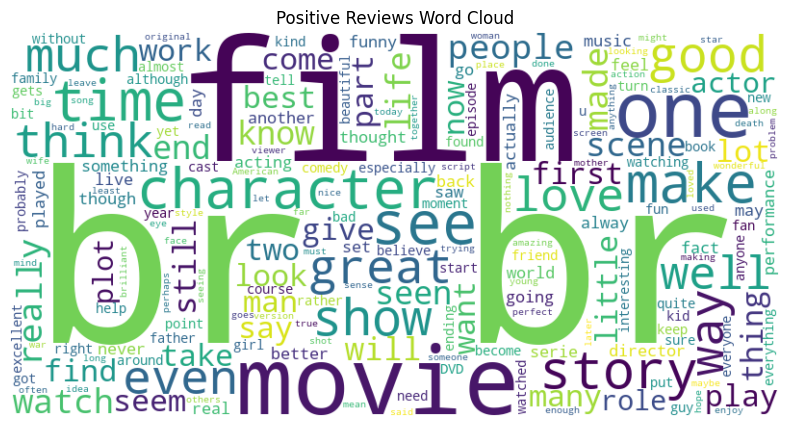

In [71]:
def plot_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
negative_text = " ".join(review for review in IMDB_data[IMDB_data['sentiment'] == 'negative']['review'])
positive_text = " ".join(review for review in IMDB_data[IMDB_data['sentiment'] == 'positive']['review'])
plot_wordcloud(positive_text, "Positive Reviews Word Cloud", 'white')

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 创建 TfidfVectorizer 实例，限制最大特征数量
vectorizer = TfidfVectorizer(max_features=10000, min_df=1, max_df=0.8)

# 拟合并转换文本数据
X = vectorizer.fit_transform(IMDB_data['review'])

# 使用稀疏矩阵而不是转换为数组
print("TF-IDF size:", X.shape)

# 获取第一条评论的 TF-IDF 特征
first_review_tfidf = X[1].toarray()  # 仅在必要时转换为数组
# print("TF-IDF:", first_review_tfidf)
print(vectorizer.vocabulary_['br'])
print(len(vectorizer.vocabulary_))

TF-IDF size: (50000, 10000)
1166
10000


In [73]:
from bs4 import BeautifulSoup  # 导入 BeautifulSoup
import re
from sklearn.preprocessing import LabelEncoder

# 文本预处理函数
def preprocess_text(text):
    if isinstance(text, str):  # 确保输入是字符串
        # 使用 BeautifulSoup 去除 HTML 标签
        soup = BeautifulSoup(text, "html.parser")
        
        # 替换所有 <br> 标签为一个空格
        for br in soup.find_all("br"):
            br.replace_with(" ")  # 将 <br> 替换为空格
        
        text = soup.get_text()  # 获取纯文本
        text = text.lower()  # 转换为小写
        # 去除特殊字符和数字
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text)  # 替换多个空格为一个空格
        return text.strip()  # 去除首尾空格
    return ""  # 如果不是字符串，返回空字符串

# 应用预处理函数
IMDB_data['cleaned_review'] = IMDB_data['review'].apply(preprocess_text)

# 打印预处理后的样本
print("\nSample of Preprocessed Reviews:")
print(IMDB_data[['cleaned_review']].head())

C:\Users\ROG\AppData\Local\Temp\ipykernel_1440\569290763.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")



Sample of Preprocessed Reviews:
                                      cleaned_review
0  one of the other reviewers has mentioned that ...
1  a wonderful little production the filming tech...
2  i thought this was a wonderful way to spend ti...
3  basically theres a family where a little boy j...
4  petter matteis love in the time of money is a ...


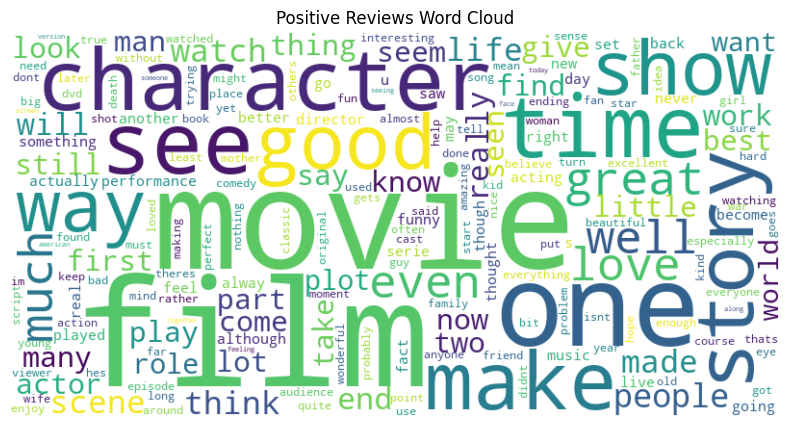

In [74]:
negative_text = " ".join(review for review in IMDB_data[IMDB_data['sentiment'] == 'negative']['cleaned_review'])
positive_text = " ".join(review for review in IMDB_data[IMDB_data['sentiment'] == 'positive']['cleaned_review'])
plot_wordcloud(positive_text, "Positive Reviews Word Cloud", 'white')

In [80]:

# 情感标签编码
encoder = LabelEncoder()
IMDB_data['sentiment_encoded'] = encoder.fit_transform(IMDB_data['sentiment'])

# 使用 TF-IDF 转换文本数据
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 1), stop_words='english')
Y = tfidf.fit_transform(IMDB_data['cleaned_review'])

# 使用稀疏矩阵而不是转换为数组
print("TF-IDF size:", Y.shape)

# 获取第一条评论的 TF-IDF 特征
first_review_tfidf = Y[1].toarray()  # 仅在必要时转换为数组
print("TF-IDF:", first_review_tfidf)
print('br' in tfidf.vocabulary_)
print(len(tfidf.vocabulary_))

TF-IDF size: (50000, 5000)
TF-IDF: [[0. 0. 0. ... 0. 0. 0.]]
False
5000


In [76]:
IMDB_data.to_csv("IMDB_data_cleaned.csv", index=False)